In [1]:
import shutil
from pathlib import Path
from resipy import Project
from gp_tools.ert.utils import format_data
from gp_tools.core.file_types import OHMfile
from gp_tools.ert.gap_filling import GapFillerNeighbor

API path =  c:\Users\peter\miniforge3\envs\general_gp\Lib\site-packages\resipy
ResIPy version =  3.6.1
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
k = Project(typ='R2', dirname='./temp_dir')
k.createSurvey(fname=Path('files/test.ohm'), ftype='BERT')
k.filterElec([50])
k.filterRecip(15)

_ = OHMfile.write('files/filtered_test.ohm', *format_data(k, rename_col=True))
shutil.rmtree('./temp_dir', ignore_errors=True)

Working directory is: c:\Users\peter\Documents\02_coding\02_Geophysics\geophysics_repo\tutorials\ERT\temp_dir
filterData: 0 / 3080 quadrupoles removed.
3080/3080 reciprocal measurements found.
500 measurements error > 20 %
filterData: 204 / 3080 quadrupoles removed.
204 measurements removed!
filterData: 842 / 2876 quadrupoles removed.
842 measurements with greater than 15.0% reciprocal error removed!
Overwriting existing file.


Working directory is: c:\Users\peter\Documents\02_coding\02_Geophysics\geophysics_repo\tutorials\ERT\temp_dir
filterData: 0 / 3080 quadrupoles removed.
3080/3080 reciprocal measurements found.
500 measurements error > 20 %
Working directory is: c:\Users\peter\Documents\02_coding\02_Geophysics\geophysics_repo\tutorials\ERT\temp_dir
clearing dirname
filterData: 0 / 1017 quadrupoles removed.
0/1017 reciprocal measurements found.
Overwriting existing file.


c:\Users\peter\miniforge3\envs\general_gp\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


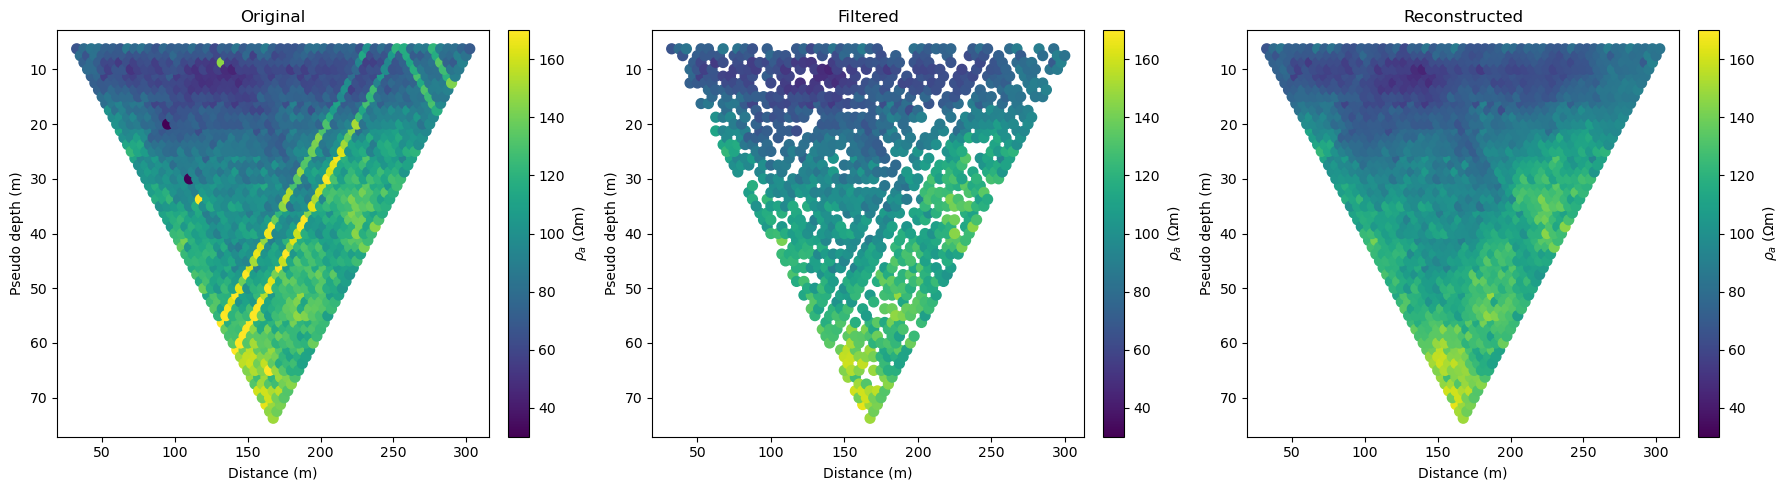

In [3]:
gapfiller = GapFillerNeighbor(horizontal_weight=5)
gapfiller.read_ohm(
    original='files/test.ohm',
    filtered='files/filtered_test.ohm'
)

gapfiller.run('files/filled_test.ohm')

_ = gapfiller.plot_comparison(vmin=30, vmax=170)

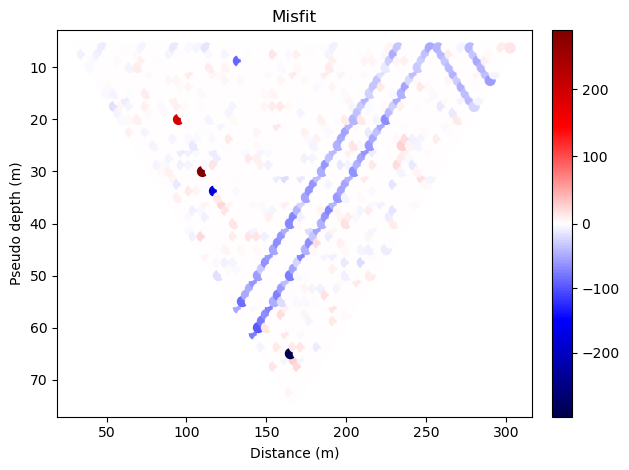

In [4]:
_ = gapfiller.plot_misfit(relative_misfit=False)